# Fuzzy Logic

In [174]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [175]:
df = pd.read_excel('restoran.xlsx')

df.head()

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4


In [176]:
# data = df.to_numpy()
data = df['pelayanan']
print(data)

0     58
1     54
2     98
3     52
4     11
      ..
95    30
96    25
97    27
98     8
99    11
Name: pelayanan, Length: 100, dtype: int64


# Linguistic Variable

Restoran (Pelayanan)  : Baik, Normal, Buruk           (3 Variable) ( Range 1-100 )

Makanan (Kualitas)    : Enak, Standar, Kurang         (3 Variable) ( Range 1-10 )

Output                : Terbaik, Tengah, Terbawah     (3 Variable)

Restoran :

        Baik    : Pelayanan > 90 dan <= 80 Tidak Baik                   [80,90 Fuzzy Area]
        Buruk   : Pelayanan <= 15 dan  > 30 Tidak Buruk                 [15,30 Fuzzy Area]
        Wajar   : >50 dan <70 Wajar || <= 15 dan > 90 Tidak Wajar       []

Restoran :

        Enak    : Kulitas >= 8 dan <= 7 Tidak baik                      [7,9]
        Kurang  : Pelayanan <= 2 dan >                                  []
        Wajar   :                                                       []

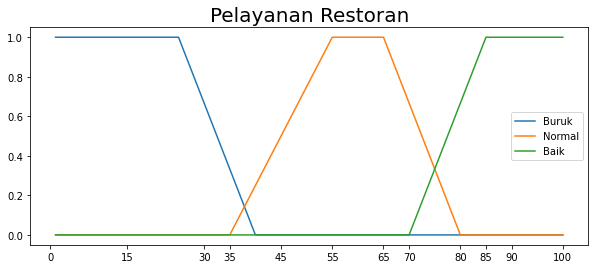

In [177]:
# Pelayanan Restoran

x1 = [1,10,25,40,100]
y1 = [1,1,1,0,0]

x2 = [1,10,35,55,65,80,100]
y2 = [0,0,0,1,1,0,0,]

x3 = [1,50,70,85,100]
y3 = [0,0,0,1,1]


plt.figure(figsize=(10,4))
plt.xticks([0,15,30,35,45,55,65,70,80,85,90,100])
plt.title("Pelayanan Restoran",fontsize=20) 

plt.plot(x1, y1, label='Buruk')
plt.plot(x2, y2, label='Normal')
plt.plot(x3, y3, label='Baik')

plt.legend()

In [178]:
# Pelayanan

# Restoran(Pelayanan)   : Baik, Normal, Buruk           (3 Variable) ( Range 1-100 )

# Makanan(Kualitas)     : Enak, Standar, Kurang           (3 Variable) ( Range 1-10 )

# batas = [15,30,45,65,75,80,85]

def pelayanan_buruk(value):
    batas1=30
    batas2=40

    if value <= batas1:
        return 1
    elif value >= batas2:
        return 0
    elif value > batas1 and value < batas2:
        return (batas2-value)/(batas2-batas1)

def pelayanan_normal(value):
    batas1=35
    batas2=55
    batas3=70
    batas4=80

    if value <= batas1 or value >= batas4:
        return 0
    elif value > batas1 and value <= batas2:
        return (value-batas1)/(batas2-batas1)
    elif value > batas2 and value <= batas3:
        return 1
    elif value > batas3 and value < batas4:
        return (batas4-value)/(batas4-batas3)

def pelayanan_baik(value):
    batas1=70
    batas2=85

    if value <= batas1:
        return 0
    elif value >= batas2:
        return 1
    elif value > batas1 and value < batas2:
        return (value-batas1)/(batas2-batas1)

print('Pelayanan Buruk : ',pelayanan_buruk(59))
print('Pelayanan Normal : ',pelayanan_normal(59))
print('Pelayanan Baik : ',pelayanan_baik(59))

Pelayanan Buruk :  0
Pelayanan Normal :  1
Pelayanan Baik :  0


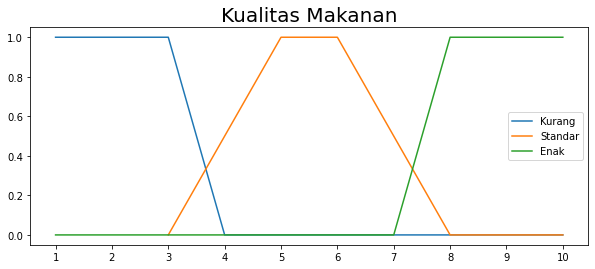

In [179]:
# Kualitas Makanan

x1 = [1,2,3,4,10]
y1 = [1,1,1,0,0]

x2 = [3,5,6,8,10]
y2 = [0,1,1,0,0]

x3 = [1,7,8,10]
y3 = [0,0,1,1]

plt.figure(figsize=(10,4))
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("Kualitas Makanan",fontsize=20) 

plt.plot(x1, y1, label='Kurang')
plt.plot(x2, y2, label='Standar')
plt.plot(x3, y3, label='Enak')

plt.legend()

In [180]:
# Kualitas Makanan

def kualitas_kurang(value):
    batas1=3
    batas2=4

    if value <= batas1:
        return 1
    elif value >= batas2:
        return 0
    elif value > batas1 and value < batas2:
        return (batas2-value)/(batas2-batas1)

def kualitas_standar(value):
    batas1=3
    batas2=5
    batas3=6
    batas4=8

    if value <= batas1 or value >= batas4:
        return 0
    elif value > batas1 and value <= batas2:
        return (value-batas1)/(batas2-batas1)
    elif value > batas2 and value <= batas3:
        return 1
    elif value > batas3 and value < batas4:
        return (batas4-value)/(batas4-batas3)

def kualitas_enak(value):
    batas1=7
    batas2=8

    if value <= batas1:
        return 0
    elif value >= batas2:
        return 1
    elif value > batas1 and value < batas2:
        return (value-batas1)/(batas2-batas1)

print('Kualitas Kurang : ',kualitas_kurang(10))
print('Kualitas Standar : ',kualitas_standar(10))
print('Kualitas Enak : ',kualitas_enak(10))

Kualitas Kurang :  0
Kualitas Standar :  0
Kualitas Enak :  1


In [181]:
def fuzifikasi_pelayanan(value):
    pelayanan_set = []

    pelayanan_set.append(pelayanan_buruk(value))
    pelayanan_set.append(pelayanan_normal(value))
    pelayanan_set.append(pelayanan_baik(value))

    return pelayanan_set

def fuzifikasi_kualitas(value):
    kualitas_set = []

    kualitas_set.append(kualitas_kurang(value))
    kualitas_set.append(kualitas_standar(value))
    kualitas_set.append(kualitas_enak(value))

    return kualitas_set


In [182]:
def inferensi(pelayanan, kualitas):
    bawah, tengah, atas = [], [], []
    
    bawah.append(min(pelayanan[0], kualitas[0]))
    bawah.append(min(pelayanan[0], kualitas[1]))
    bawah.append(min(pelayanan[1], kualitas[0]))
    bawah.append(min(pelayanan[2], kualitas[0]))
    bawah.append(min(pelayanan[0], kualitas[2]))

    tengah.append(min(pelayanan[1], kualitas[1]))
    tengah.append(min(pelayanan[1], kualitas[2]))
    tengah.append(min(pelayanan[2], kualitas[1]))

    atas.append(min(pelayanan[2], kualitas[2]))

    bawah_out = max(bawah)
    tengah_out = max(tengah)
    atas_out = max(atas)

    return [bawah_out, tengah_out, atas_out]

In [183]:
print('Inferensi : ',inferensi(fuzifikasi_pelayanan(59),fuzifikasi_kualitas(10)))

Inferensi :  [0, 1, 0]


In [184]:
def defuzi_sugeno(inferensi):
    
    # return ((40 * inferensi[0]) + (65 * inferensi[1]) + (85 * inferensi[2]))/sum(inferensi)
    return ((35 * inferensi[0]) + (65 * inferensi[1]) + (95 * inferensi[2]))/sum(inferensi)

In [185]:
inf = inferensi(fuzifikasi_pelayanan(49),fuzifikasi_kualitas(10))

defuzi_sugeno(inf)

65.0

In [186]:
df_temp = df.to_numpy().copy()

output = []

# print(len(df_temp))

for i in range(len(df_temp)):
    # print('data ke : ',i+1)
    out_1 = fuzifikasi_pelayanan(df_temp[i,1])
    out_2 = fuzifikasi_kualitas(df_temp[i,2])
    inf = inferensi(out_1,out_2)

    hasil = defuzi_sugeno(inf)

    # print('nilai : ',df_temp[i,1],' & ',df_temp[i,2])
    # print('out 1 dan 2 ', out_1, ' & ', out_2)
    # print('hasil : ',hasil)
    # print('')
    output.append(hasil)


# type(len(output))
# for i in range(len(output)):
#     print(i,output[i])

        

In [187]:
df['score'] = output

df_sorted = df.sort_values(by='score', ascending=False)

df_sorted.head(10) 

,id,pelayanan,makanan,score
23,24,100,9,95.000000
78,79,87,9,95.000000
41,42,94,10,95.000000
68,69,86,10,95.000000
21,22,79,9,90.714286
69,70,78,8,86.818182
30,31,74,9,74.230769
59,60,79,6,65.000000
33,34,93,4,65.000000
38,39,52,7,65.000000
